# SyriaTel Customer Churn Analysis

- Student name: Gamze Turan
- Student pace: self paced
- Scheduled project review date/time: Thu, Aug 4, 2022, 2:30 PM - 3:15 PM
- Instructor name: Claude Fried
- Blog post URL: https://ginaturan.blogspot.com/2022/07/what-are-decision-trees-how-do-they.html

<img align="center" width="600" height="300" src='images/people_phone.jpg'>

## Overview

I will examine the "SyriaTel Customer Churn" data in this study. The SyriaTel is a telecommunication company. To determine whether a customer will ("soon") discontinue doing business with Syria Tel is the goal of the study.

The best way the determine is to make a predictive model which will classify customers who might stop doing business with Syria Tel, using the data.

I will build a model for classifying whether customer will stop business True or False.

## Business Understanding

This search will detecting which customers are likely to leave a sevice or to cancel a subcription to a service.

Select a modelthat will be the most accurate in predicting which client will discontinue doing business with SyriaTel.

## Data Understanding

The Data comes from SyriaTel and includes information about their customers. The dataset has customer's state of residence, telephone numbers and length of the account.

There are columns indicating if the customers has an international plan and voicemail plan, how many voice mails they receive.

The dataset includes how many minutes they spend talking, how many calls they make and how much they are charged during day, evening and night periods.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

#To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
scc = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")
scc.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Checking the number of rows and columns in the data
scc.shape

(3333, 21)

* There are a total 21 columns and 3,333 observations in the dataset.

## Data Overview

In [4]:
# Let's Create a Copy of data
data = scc.copy()

In [5]:
# Displying first 5 rows of the data
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Displaying last 5 rows od the data
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
# Let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
# cheking for dublicates in the data
data.duplicated().sum()

0

In [9]:
# checking for missing values in the data
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


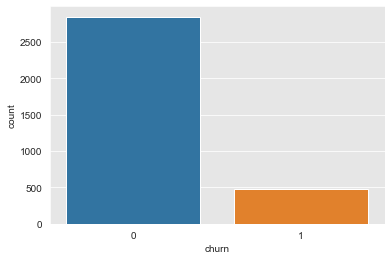

In [103]:
# churn customer countplot
sns.countplot(x = "churn", data = data);
#plt.savefig('images/churn_cusmomer_count.png')

## Data Preprocessing

I will remove the column 'phone number' from the dataset because most digit in the phone number is random, and we will not use for modeling.

In [11]:
data = data.drop("phone number", axis=1)

In the dataset international plan and voice mail plan are object to data type. Similarly churn columns bool data type. I will convert these columns to binary.

In [12]:
# Convert to binary
data["international plan"] = data["international plan"].map({"yes": 1, "no": 0})
data["voice mail plan"] = data["voice mail plan"].map({"yes": 1, "no": 0})
data["churn"] = data["churn"].map({True: 1, False: 0})
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


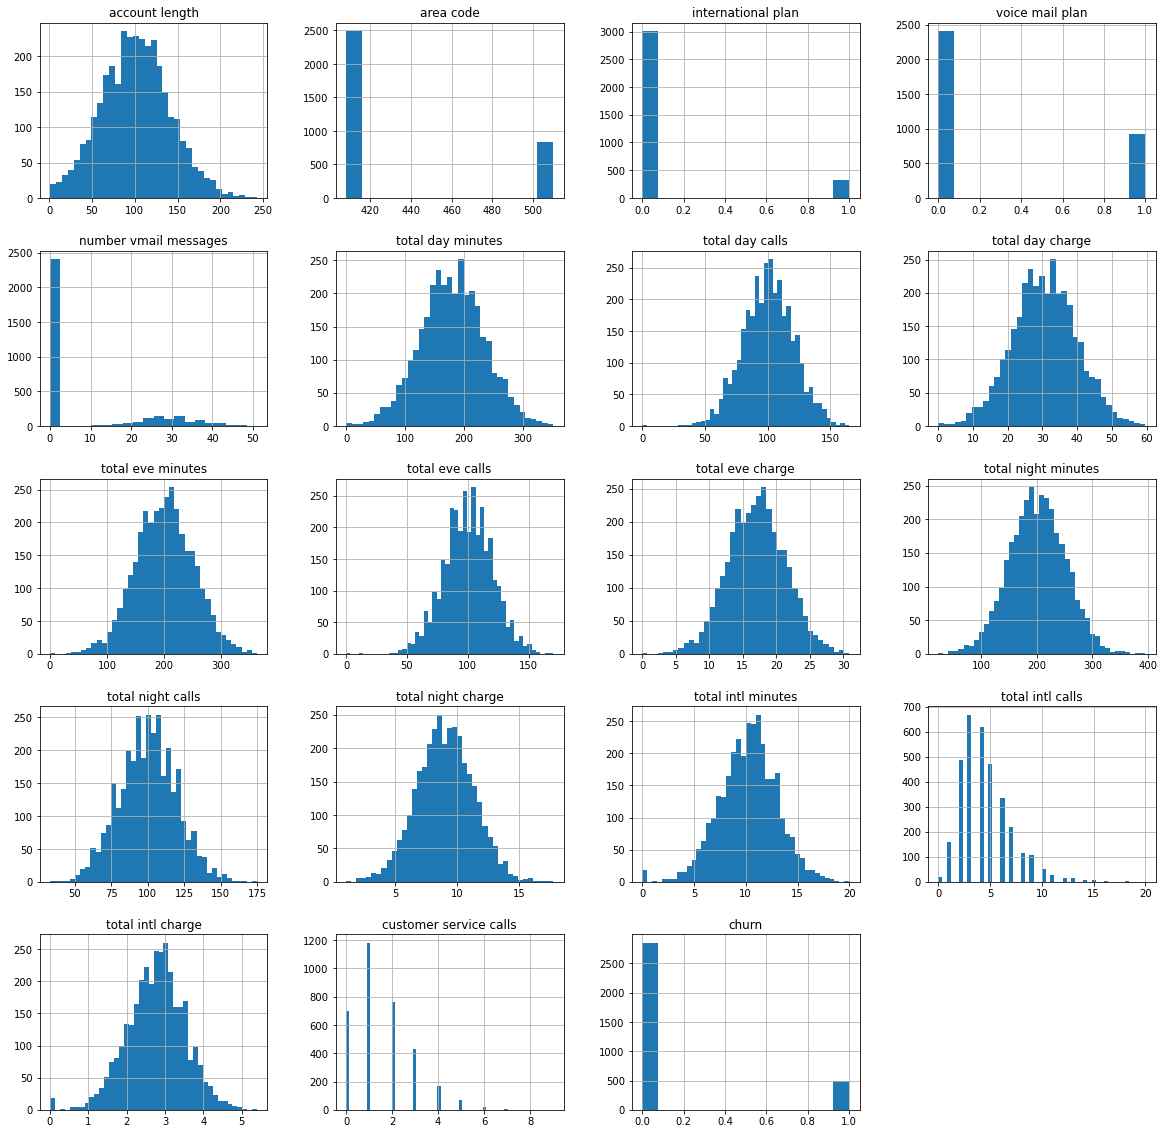

In [13]:
data.hist(figsize=(20, 20), bins="auto");
#plt.savefig("images/histograms_All.png")

> Now, the binary variables have type int64. I will changed the dtype to object for these variables, to make them available for dummy variable creation.

> The variable 'area code' is also dtype int64, however it is a categorical variable. I will also change it to object

In [14]:
# changing binary variable dtypes int64 to object to create dummy variable
# changing categorical variable dtype object
data = data.astype({"international plan": "object"})
data = data.astype({"voice mail plan": "object"})
data = data.astype({"area code": "object"})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total night calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


In [17]:
data['total charge'] = (data['total day charge'] + data['total eve charge'] + data['total night charge'] + data['total intl charge']) * data['account length']

### Scatter Plot of Total Customer Spend Over Time

> I create a scatter plot to check total customer spending over time. You can see a line of cancelling customers above the staying ones, indicating higher spend for some cancelling customer.

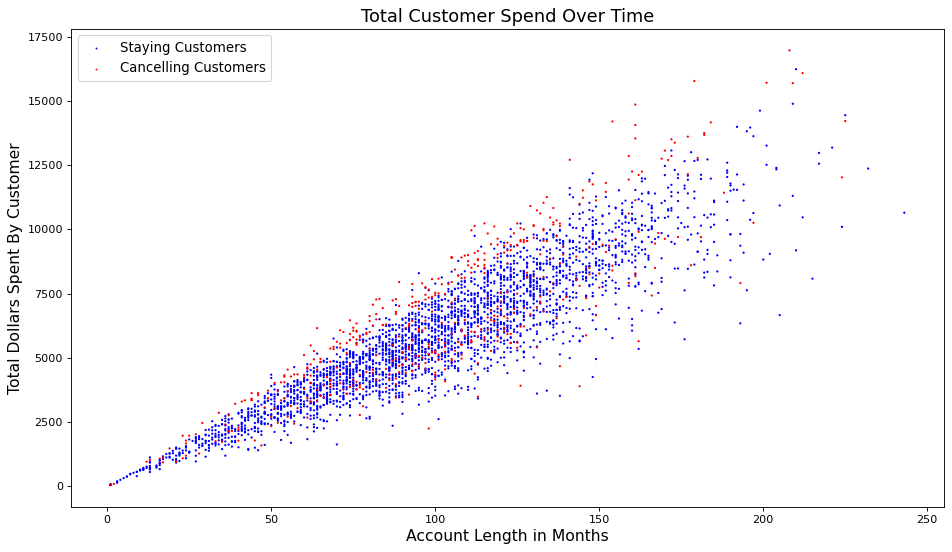

In [18]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(data['account length'], data['total charge'], data['churn'] == 0, c="blue", label = 'Staying Customers')
plt.scatter(data['account length'], data['total charge'], data['churn'] == 1, c="red", label = 'Cancelling Customers')
plt.title("Total Customer Spend Over Time", fontsize = 16)
plt.xlabel("Account Length in Months", fontsize = 14)
plt.ylabel("Total Dollars Spent By Customer", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'center')
plt.legend(fontsize= 12)
plt.tight_layout()
#plt.savefig('images/total_customer_spend.png')
plt.show()

### Heatmap to find the correlation between variables

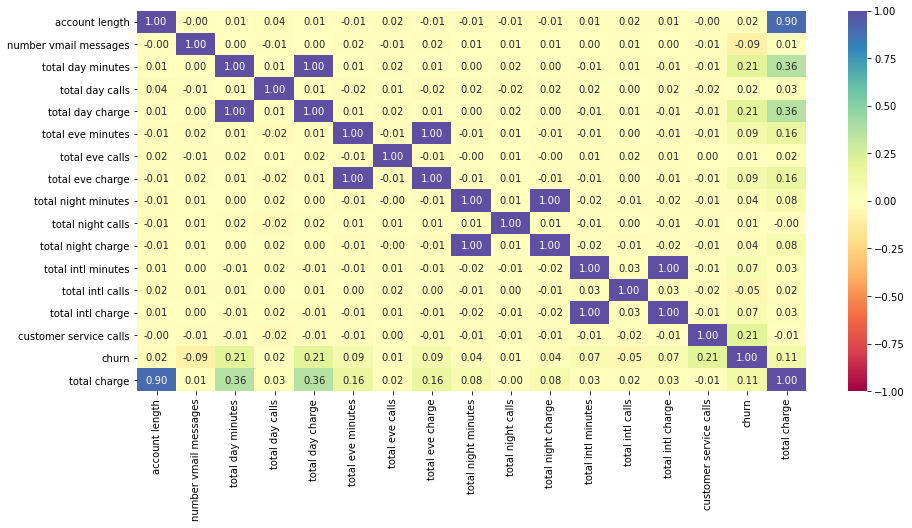

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.savefig('images/heatmap.png')
plt.show()

> Total day minutes and Total day charges, Total evening minutes and Total evening charge, Total night minutes and Total Night charges, Total intl minutes and Total intl charge have positive correlation which make sense that customer take minutes if the amount of charges is high.

> Other variables have no significant correlation between them

## Data Preparation for  Modeling

### Split Data

In [20]:
# Seperate data into train and test split
from sklearn.model_selection import train_test_split 

df = data.copy()

In [21]:
X = df.drop(["churn"], axis=1)
y = df["churn"]

In [22]:
# creating dummies
X = pd.get_dummies(X)
X

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,1,0,1,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,1,0,0,1,0,1,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,1,1,0,1,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,1,0,1,1,0


In [23]:
# Splitting data into training, validation and test sets:
# First I split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we spit the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(1999, 74) (667, 74) (667, 74)


In [24]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (1999, 74)
y_train shape =  (1999,)
X_test shape =  (667, 74)
y_test shape =  (667,)


In [25]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 1999
Number of rows in validation data = 667
Number of rows in test data = 667


In [26]:
print("Train percent :", y_train.value_counts(normalize=True)[1])
print("Test percent : ", y_test.value_counts(normalize=True)[1])

Train percent : 0.14457228614307155
Test percent :  0.1454272863568216


In [27]:
# Scale/Normalize the predictor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,-0.575833,-0.587153,-0.644409,-0.499863,-0.644463,-1.290603,-0.472427,-1.291353,0.208536,1.456823,...,-0.160169,-0.187656,-0.156853,-0.571381,0.984611,-0.571381,0.335275,-0.335275,0.614549,-0.614549
1,-1.373747,-0.587153,-2.376847,0.990630,-2.376471,-0.448284,1.108706,-0.447538,-0.981898,-0.255649,...,-0.160169,-0.187656,-0.156853,-0.571381,-1.015630,1.750145,-2.982623,2.982623,0.614549,-0.614549
2,-0.451159,-0.587153,1.968657,-0.003032,1.968910,0.624646,-0.175964,0.623901,0.429502,2.442792,...,-0.160169,-0.187656,-0.156853,-0.571381,0.984611,-0.571381,0.335275,-0.335275,0.614549,-0.614549
3,1.294277,-0.587153,-0.455317,1.089996,-0.454842,0.241597,-1.460635,0.242229,-0.476262,0.211388,...,-0.160169,-0.187656,-0.156853,-0.571381,-1.015630,1.750145,0.335275,-0.335275,0.614549,-0.614549
4,0.296885,-0.587153,-0.183385,-0.748279,-0.183653,-2.793487,-0.719479,-2.792746,-0.450383,1.197357,...,-0.160169,-0.187656,-0.156853,-0.571381,0.984611,-0.571381,0.335275,-0.335275,0.614549,-0.614549


## Logistic Regression Model

> Here, a ROC Curve can be used to show the performance of a classification model at all classification thresholds. This curve plots two parameters: true positive rate and false positive rate.

> Area Under the ROC Curve(AUC): An aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger the better.

> The AUC of .79 indicates that this model is sorting the values at an acceptable way, but not an excellent way.

AUC: 0.7945378911195516


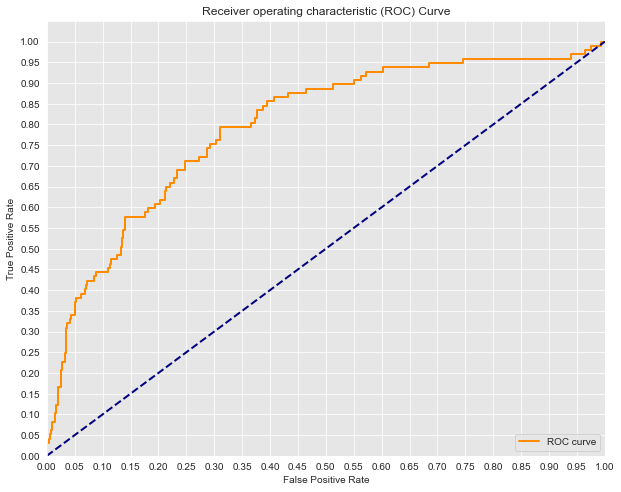

In [28]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score


# Initial Model # what does the solver indicate?
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

#Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right');
#plt.savefig("images/LogisticRegressionModel.png")

In [29]:
y_pred = logreg.predict(X_test)

## Resampling

> I work on resampling of the data to find the number of perentage if customer stay with SyriaTel or not with the normalized true.

In [30]:
print('Original whole data class distribution:')
print(y.value_counts())
print('Original whole data class distribution, normalized:')
print(y.value_counts(normalize=True))

Original whole data class distribution:
0    2850
1     483
Name: churn, dtype: int64
Original whole data class distribution, normalized:
0    0.855086
1    0.144914
Name: churn, dtype: float64


> The analysis shows that 85.5% of customers stay with SyriaTel while 14.5% of customers discontinue doing business with the company.Thus, we will have 85.5% accuracy if we forecast that all consumers will continue. This explains why the model's accuracy score is high despite the other metrics' low values.

> By using SMOTE I create a synthetic training sample to take care of imbalance.

In [31]:
# Import SMOTE, resample
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print('Original training data class distribution:')
print(y_train.value_counts())
print('Synthetic training data class distribution:')
print(y_train_resampled.value_counts())

Original training data class distribution:
0    1710
1     289
Name: churn, dtype: int64
Synthetic training data class distribution:
1    1710
0    1710
Name: churn, dtype: int64


In [32]:
# New model after resampling
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled_resampled, y_train_resampled)

print('Training Data:\n', classification_report(y_train_resampled, logreg.predict(X_train_scaled_resampled)))
print('Testing Data:\n', classification_report(y_test, logreg.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1710
           1       0.81      0.82      0.82      1710

    accuracy                           0.81      3420
   macro avg       0.81      0.81      0.81      3420
weighted avg       0.81      0.81      0.81      3420

Testing Data:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       570
           1       0.34      0.65      0.44        97

    accuracy                           0.76       667
   macro avg       0.63      0.72      0.65       667
weighted avg       0.84      0.76      0.79       667



> After resampling, the Logistic Regression Model performance is clearly improved.

> The performance in training data is better test data. This is sign of overfitting.

### Parameter Tuning

> I initially used the default paremeters for the Logistic Regression model. I will now apply parameter
tuning with GridSearchCV. It will determine the best parameter combination for the given parameter
grid.

In [33]:
print('Default parameters:')
logreg.get_params()

Default parameters:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
# Tuning Logistic Regression model with GridSearchCV
from sklearn.model_selection import GridSearchCV

logreg_param_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e5, 1e20],
}

logreg_gs = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='f1')
#logreg_gs.fit(X_train_scaled, y_train)
logreg_gs.fit(X_train_scaled_resampled, y_train_resampled)

#score_logreg_gs = logreg_gs.score(X_test_scaled, y_test)
#print('f1-score for test data:', score_logreg_gs)

print('Parameter Tuning Results:\n')
print("Best Parameter Combination:", logreg_gs.best_params_)
print('Training Data:\n', classification_report(y_train_resampled, logreg_gs.predict(X_train_scaled_resampled)))
print('Testing Data:\n', classification_report(y_test, logreg_gs.predict(X_test_scaled)))

Parameter Tuning Results:

Best Parameter Combination: {'C': 100000.0, 'solver': 'lbfgs'}
Training Data:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1710
           1       0.80      0.83      0.81      1710

    accuracy                           0.81      3420
   macro avg       0.81      0.81      0.81      3420
weighted avg       0.81      0.81      0.81      3420

Testing Data:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       570
           1       0.34      0.66      0.45        97

    accuracy                           0.77       667
   macro avg       0.64      0.72      0.65       667
weighted avg       0.85      0.77      0.79       667



> It appears that the performance wasn't significantly improved by parameter adjustment using the provided parameter grid. Overfitting has been noticed.

### Logistic Regression Evaluation 

In [35]:
con_matrix = confusion_matrix(y_test, y_pred)
con_matrix

array([[556,  14],
       [ 79,  18]], dtype=int64)

### Confusion Matrix Breakdown in this Order

> True Negatives: Predicting that they will not cancel and being correct.

> False Positives: Predicting that they will cancel and being wrong.

> False Negatives: Predicting that they're not going to cancel and being wrong.

> True Positive: Predicting that they will cancel and being correct.

### Recall Calculation

A Type II error would be more detrimental to this project than a Type I error. In the
event of a Type II error, SyriaTel would have predicted incorrectly that their customer
would not churn, which would suggest a false negative. In contrast to a Type I error or
false positive, in which SyriaTel incorrectly predicted that a client would churn but
they did not, this is significantly worse.
Recall is the best metric to aim for because a Type II Error is a worse case situation
when it comes to the practical application of the results. Recall here gauges how well
the model can forecast cancellations.
Recall at.14 is poor, hence alternative models should be used.

In [36]:
recall_score(y_test, y_pred)

0.18556701030927836

## K-Nearest Neighbors Model

In [37]:
# import K-nearest Neighbor library
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
test_preds = knn.predict(X_test)

In [38]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.47058823529411764
Recall Score: 0.08247422680412371
Accuracy Score: 0.8530734632683659
F1 Score: 0.14035087719298245


### K-Nearest Neighbors Evaluation

In [39]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
            
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

In [40]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.17525773195876287


In [41]:
print('Default parameters:')
knn.get_params()

Default parameters:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
# Tuning KNN model with GridSearchCV
# Takes about 10 minutes on my PC

knn_param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8],
    'p': [1, 2, 3, 4]
}

knn_gs = GridSearchCV(knn, knn_param_grid, cv=5, scoring='f1')
#knn_gs.fit(X_train_scaled, y_train)
knn_gs.fit(X_train_scaled_resampled, y_train_resampled) # Lower performance, f1=0.247

# score_knn_gs = knn_gs.score(X_test_scaled, y_test)
#print('f1-score for test data:', score_knn_gs)

print('Parameter Tuning Results:\n')
print("Best Parameter Combination:", knn_gs.best_params_)
print('Training Data:\n', classification_report(y_train_resampled, knn_gs.predict(X_train_scaled_resampled)))
print('Testing Data:\n', classification_report(y_test, knn_gs.predict(X_test_scaled)))

Parameter Tuning Results:

Best Parameter Combination: {'n_neighbors': 4, 'p': 1}
Training Data:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1710
           1       0.93      0.99      0.96      1710

    accuracy                           0.96      3420
   macro avg       0.96      0.96      0.96      3420
weighted avg       0.96      0.96      0.96      3420

Testing Data:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       570
           1       0.31      0.35      0.33        97

    accuracy                           0.79       667
   macro avg       0.60      0.61      0.61       667
weighted avg       0.80      0.79      0.80       667



> The performance of the fitting on resampled training data is better. For test data, the f1-score increased from 0.15 to 0.29.(The findings for the resampled data are tested; they are not displayed here.)

> Overfitting was noticed.

## Decision Tree Model

In [43]:
# import library
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [44]:
# Make predictions using test set
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.834400434074878

In [45]:
recall_score(y_test, y_pred)

0.7319587628865979

In [46]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=4,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25,
                           random_state= 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.5

In [47]:
print('Recall: ', recall_score(y_test, y_pred))

Recall:  0.0


### Tuning the Decison Tree Model

* Train the AUC, and Test AUC will be indicative of training and test error for learning.

### Identifying Ideal Maximum Tree Depth

* 5 is the ideal maximum tree depth.Greather tree depth is indicative of overfitting as Train AUC soars above Test AUC. At 6, the Test AUC is above the Train AUC.

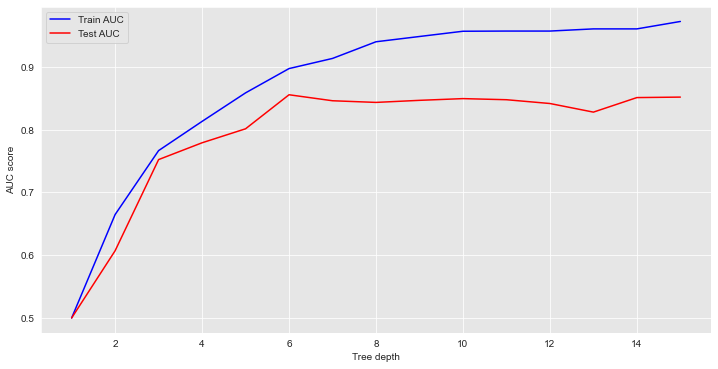

In [48]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=1)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend();
#plt.savefig("images/AUC_Score.png")

In [49]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[536  34]
 [ 23  74]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.69      0.76      0.72        97

    accuracy                           0.91       667
   macro avg       0.82      0.85      0.84       667
weighted avg       0.92      0.91      0.92       667



In [50]:
print('Testing Accuracy for Decision Tree Classifier: {:.4}%'.format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 91.45%


### Parameter Tuning

In [51]:
print('Default parameters:')
dt.get_params()

Default parameters:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [52]:
# Tuning Decision Trees model with GridSearchCV
# Takes more then 10 minutes on my PC

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5, 6],
    #'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

dt_gs = GridSearchCV(dt, dt_param_grid, cv=5, scoring='f1')
#dt_gs.fit(X_tarin_scaled, y_train)
dt_gs.fit(X_train_scaled_resampled, y_train_resampled)

#score_dt_gs = dt_gs.score(X_test_scaled, y_test)
# print('f1_score for test data:', score_dt_gs)

print('Parameter Tuning Results:\n')
print("Best Parameter Combination:", dt_gs.best_params_)
print('Training Data:\n', classification_report(y_train_resampled, dt_gs.predict(X_train_scaled_resampled)))
print('Testing Data:\n', classification_report(y_test, dt_gs.predict(X_test_scaled)))

Parameter Tuning Results:

Best Parameter Combination: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3}
Training Data:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1710
           1       0.95      0.85      0.90      1710

    accuracy                           0.90      3420
   macro avg       0.91      0.90      0.90      3420
weighted avg       0.91      0.90      0.90      3420

Testing Data:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       570
           1       0.68      0.80      0.74        97

    accuracy                           0.92       667
   macro avg       0.82      0.87      0.85       667
weighted avg       0.92      0.92      0.92       667



* The parameter tuning improved the Decision Tree performance a little.
* Overfitting observed

## Bagged Trees + Decision Tree Model

> The bagging classifier is used to reduce variance in the dataset. Decision trees have low bias but
high variance which can lead to overfitting and drastic output changes when minute input changes are made

In [53]:
# import library
from sklearn.ensemble import BaggingClassifier

bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=4),
                                n_estimators=20, random_state=1)

In [54]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  n_estimators=20, random_state=1)

In [55]:
bagged_tree.score(X_train, y_train)

0.9524762381190596

In [56]:
bagged_tree.score(X_test, y_test)

0.9400299850074962

In [57]:
y_pred = bagged_tree.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[562   8]
 [ 32  65]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.89      0.67      0.76        97

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



In [59]:
recall_score(y_test, y_pred)

0.6701030927835051

In [60]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5),
                                n_estimators=20, random_state=1)

In [61]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20, random_state=1)

In [62]:
bagged_tree.score(X_test, y_test)

0.9430284857571214

In [63]:
y_pred = bagged_tree.predict(X_test)

In [64]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[563   7]
 [ 31  66]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.90      0.68      0.78        97

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



In [65]:
recall_score(y_test, y_pred)

0.6804123711340206

> Random Forest Model's performance was not enhanced by parameter adjustment

> Overfitting was noticed.

## Gradient Boost Model

> To reduce to overall prediction error, Gradient Boost combines the prior models with the next best model that might be used. This classification model's prediction error gauges how accurately it forecast the variable of client churn.

In [66]:
#import library
from sklearn.ensemble import GradientBoostingClassifier

gbt_clf = GradientBoostingClassifier(random_state=1)

In [67]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [68]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

### Traning Score

In [69]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 1.0
Recall Score: 0.8477508650519031
Accuracy Score: 0.9779889944972486
F1 Score: 0.9176029962546817


In [70]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.89      0.64      0.74        97

    accuracy                           0.94       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.93      0.94      0.93       667



In [71]:
recall_score(y_test, y_pred)

0.6804123711340206

### Parameter Tuning

In [72]:
print('Default parameters:')
gbt_clf.get_params()

Default parameters:


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Adaboost Model

In [73]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(random_state= 1)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [74]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

### Training Score

In [75]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.7555555555555555
Recall Score: 0.47058823529411764
Accuracy Score: 0.9014507253626813
F1 Score: 0.5799573560767589


### Testing Score

In [76]:
recall_score(y_test, y_pred)

0.6804123711340206

## Random Forest Model

In [77]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20, max_depth= 11, random_state = 1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=20, random_state=1)

In [78]:
y_pred = forest.predict(X_test)

In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   4]
 [ 57  40]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       570
           1       0.91      0.41      0.57        97

    accuracy                           0.91       667
   macro avg       0.91      0.70      0.76       667
weighted avg       0.91      0.91      0.89       667



In [80]:
# training score
forest.score(X_train, y_train)

0.9719859929964982

In [81]:
# testing score
forest.score(X_test, y_test)

0.9085457271364318

In [82]:
recall_score(y_test, y_pred)

0.41237113402061853

> The parameter tuning didnt improve the performance of Random Forest model.

> Overfitting observed.

## XGBoost Model

In [83]:
from xgboost import XGBClassifier, plot_importance

xg = XGBClassifier(random_state=1, eval_metric='logloss') #'logloss' is default, but specified to stop warning
xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 100.0%
Validation accuracy: 94.6%
Training Recall: 100.0%
Test Recall: 67.01%


### Parameter Tuning

In [84]:
print('Default parameters:')
xg.get_params()

Default parameters:


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss'}

In [85]:
# Tuning XGBClassifier with GridSearchCV
# Takes more than 10 minutes om my PC

from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
     'max_depth': [2, 3, 4, 5, 6],
     'min_child_weight': [1, 2],
     'subsample': [0.5, 0.7],
     'n_estimators': [30, 100],
}

xgb_gs = GridSearchCV(xg, xgb_param_grid, cv=5, scoring='f1')
xgb_gs.fit(X_train_scaled_resampled, y_train_resampled)

score_xgb_gs = xgb_gs.score(X_test_scaled, y_test)
print('f1-score on test data:', score_xgb_gs)

print('Parameter Tuning Results:\n')
print("Best Parameter Combination:", xgb_gs.best_params_)
print('Training Data:\n', classification_report(y_train_resampled, xgb_gs.predict(X_train_scaled_resampled)))
print('Testing Data:\n', classification_report(y_test, xgb_gs.predict(X_test_scaled)))

f1-score on test data: 0.7701149425287357
Parameter Tuning Results:

Best Parameter Combination: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}
Training Data:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1710
           1       1.00      0.98      0.99      1710

    accuracy                           0.99      3420
   macro avg       0.99      0.99      0.99      3420
weighted avg       0.99      0.99      0.99      3420

Testing Data:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       570
           1       0.87      0.69      0.77        97

    accuracy                           0.94       667
   macro avg       0.91      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667



## Tuning XGBoost Model with GridSearchCV

In [86]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}


In [87]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 99.0%
Validation accuracy: 94.6%
Training Recall: 93.08%
Test Recall: 68.04%


## XGBoost with Optimal Parameters

In [88]:
xg = XGBClassifier(max_depth = 6, learning_rate = .1, n_estimators = 100, min_child_weight = 1, subsample = .7, random_state = 1, eval_metric='logloss')

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 99.0%
Validation accuracy: 94.6%
Training Recall: 93.08%
Test Recall: 68.04%


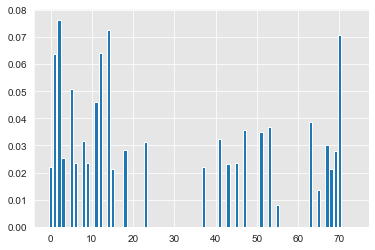

In [89]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_);
#plt.savefig("images/xgboost.png")

## Best Performing Models

> Since desicion trees can be simpler to read, I have decided to stick with for the rest of my investigation.

In [90]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [91]:
# Make predictions using test set
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, threshols = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.834400434074878

In [92]:
recall_score(y_test, y_pred)

0.7319587628865979

## Compare the Models

> In this part, I will contrast the avaliable categorization models in order to determine which is the most effective at identifying potential consumers for SyriaTel.

> I will now consider evaluation metrics like f1, recall, accuracy and precision.

> For each model, I will also calculate AUC and plot ROC curves.

### Optimum parameter sets, with f1-score used for tuning

* Logictic Regression: {'C': 0.01, 'solver': 'liblinear'}
* KNN: Default
* Decision Trees: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}
* Bagging classifier: {DescisionTreeClassifier {'criterion': 'gini', 'max_depth': 5}, 'n_estimators': 20
* Gradient Boost: Default
* Adaboost: Default
* Random Forest: Default
* XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100

In [93]:
# Instantiate models with optimum parameters

logreg_best = LogisticRegression(C=0.01, solver='liblinear', random_state=42)
knn_best = KNeighborsClassifier()
dt_best = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=6)
bt_best = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5),
                                n_estimators=20, random_state=42)
gbt_best = GradientBoostingClassifier(random_state=42)
ada_best = AdaBoostClassifier(random_state= 42)
rf_best = RandomForestClassifier(random_state=42)
xgb_best = XGBClassifier(learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, \
                         random_state=42, eval_metric='logloss')

total_list = [logreg_best, knn_best, dt_best, bt_best, gbt_best, ada_best, rf_best, xgb_best]
model_names = ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree', 'Bagging Classifier',
               'Gradient Boost', 'Adaboost', 'Random Forest', 'XGBoost']

In [94]:
def total_scores(dataset_type, X_scaled, y_true):
    """
    dataset_type = 'Testing' or 'Training' 
    X_scaled = X_test_scaled or X_train_scaled
    y_true = y_train or y_test
    
    """
    colors = sns.color_palette('Set3')
    plt.figure(figsize=(10, 8))

    total_scores_list = []

    for n, clf in enumerate(total_list):
        
        clf.fit(X_train_scaled_resampled, y_train_resampled)
    
        y_pred = clf.predict(X_scaled)
        
        y_prob = clf.predict_proba(X_scaled) 
        fpr, tpr, thresholds = roc_curve(y_true, y_prob[:,1])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[n], lw=2, label=f'{model_names[n]}, AUC={round(auc_score, 4)}')
        
        fit_scores = {'model': model_names[n],
                        'precision': round(precision_score(y_true, y_pred),3),
                        'recall': round(recall_score(y_true, y_pred),3),
                        'accuracy': round(accuracy_score(y_true, y_pred),3),
                        'f1': round(f1_score(y_true, y_pred),3),
                        'auc': round(auc_score,3)
                       }
    
        total_scores_list.append(fit_scores)
    
    plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {dataset_type} Data', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.savefig(f'images/ROC_Curve_{dataset_type}.png')
    plt.show()    

    total_scores_df = pd.DataFrame(total_scores_list)
    total_scores_df = total_scores_df.set_index('model')
    
        
    return total_scores_df

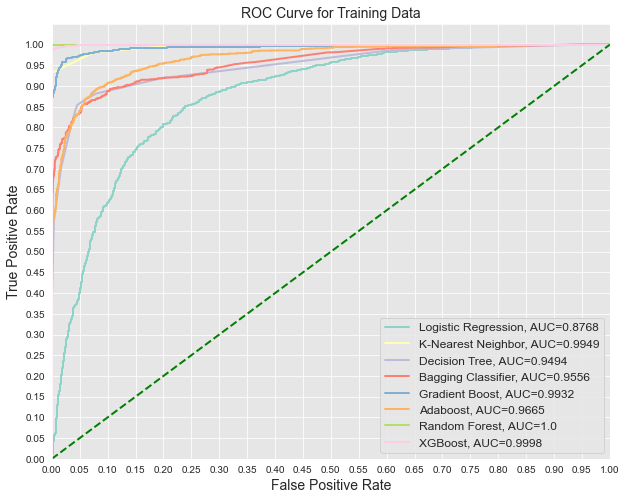

,precision,recall,accuracy,f1,auc
model,,,,,
Logistic Regression,0.783,0.842,0.804,0.811,0.877
K-Nearest Neighbor,0.837,0.995,0.901,0.909,0.995
Decision Tree,0.949,0.854,0.904,0.899,0.949
Bagging Classifier,0.940,0.853,0.899,0.895,0.956
Gradient Boost,0.978,0.958,0.968,0.968,0.993
Adaboost,0.917,0.892,0.906,0.904,0.967
Random Forest,1.000,1.000,1.000,1.000,1.000
XGBoost,0.999,0.984,0.992,0.991,1.000


In [95]:
total_scores('Training', X_train_scaled_resampled, y_train_resampled)

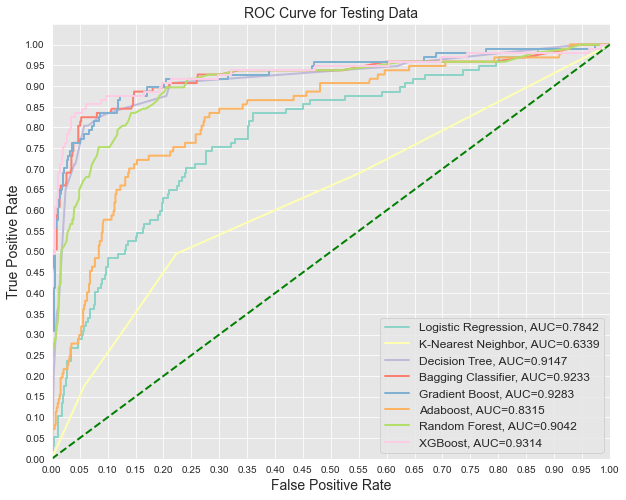

,precision,recall,accuracy,f1,auc
model,,,,,
Logistic Regression,0.328,0.680,0.751,0.443,0.784
K-Nearest Neighbor,0.274,0.495,0.736,0.353,0.634
Decision Tree,0.678,0.804,0.916,0.736,0.915
Bagging Classifier,0.690,0.825,0.921,0.751,0.923
Gradient Boost,0.777,0.753,0.933,0.764,0.928
Adaboost,0.514,0.567,0.859,0.539,0.831
Random Forest,0.720,0.608,0.909,0.659,0.904
XGBoost,0.877,0.732,0.946,0.798,0.931


In [96]:
total_scores('Testing', X_test_scaled, y_test)

## Final Model 

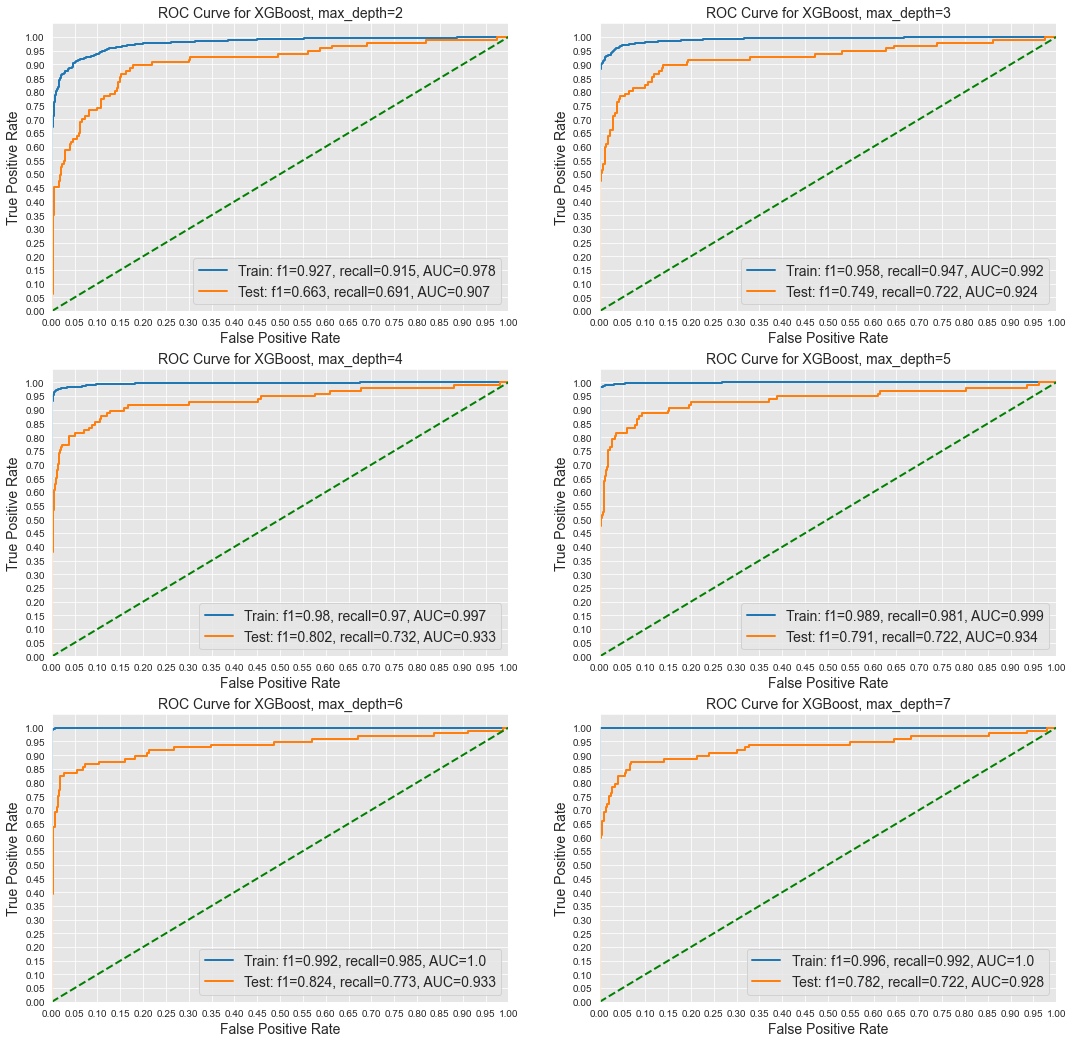

In [97]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

depths = [2, 3, 4, 5, 6, 7]

for ax, d in zip(axes.flat, depths):
    
    xgb_clf = XGBClassifier(learning_rate=0.1, max_depth=d, min_child_weight=1, \
                             subsample=0.7, random_state=42, eval_metric='logloss')
    xgb_clf.fit(X_train_scaled_resampled, y_train_resampled)
    
    y_train_pred = xgb_clf.predict(X_train_scaled_resampled)
    y_train_prob = xgb_clf.predict_proba(X_train_scaled_resampled) # each class probability estimates
    fpr_train, tpr_train, threshold_train = roc_curve(y_train_resampled, y_train_prob[:,1])
    auc_train = round(auc(fpr_train, tpr_train),3)
    f1_train = round(f1_score(y_train_resampled, y_train_pred),3)
    recall_train = round(recall_score(y_train_resampled, y_train_pred),3)
    ax.plot(fpr_train, tpr_train, lw=2, label=f'Train: f1={f1_train}, recall={recall_train}, AUC={auc_train}')
    
    y_test_pred = xgb_clf.predict(X_test_scaled)
    y_test_prob = xgb_clf.predict_proba(X_test_scaled) # each class probability estimates
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob[:,1])
    auc_test = round(auc(fpr_test, tpr_test),3)
    f1_test = round(f1_score(y_test, y_test_pred),3)
    recall_test = round(recall_score(y_test, y_test_pred),3)
    ax.plot(fpr_test, tpr_test, lw=2, label=f'Test: f1={f1_test}, recall={recall_test}, AUC={auc_test}')
    
    ax.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_yticks([i/20.0 for i in range(21)])
    ax.set_xticks([i/20.0 for i in range(21)])
    ax.set_xlabel('False Positive Rate', fontsize=14)
    ax.set_ylabel('True Positive Rate', fontsize=14)
    ax.set_title(f'ROC Curve for XGBoost, max_depth={d}', fontsize=14)
    ax.legend(loc='lower right', fontsize=14)
    
#plt.savefig('images/Roc_curve_XGB_maxd.png')

In [98]:
# Fit Final Model

xgb_final = XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=1, \
                         subsample=0.7, random_state=42, eval_metric='logloss')

xgb_final.fit(X_train_scaled_resampled, y_train_resampled)

print('Final Model:\n')
print('Training Data:\n', classification_report(y_train_resampled, xgb_final.predict(X_train_scaled_resampled)))
print('Testing Data:\n', classification_report(y_test, xgb_final.predict(X_test_scaled)))

Final Model:

Training Data:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1710
           1       1.00      0.98      0.99      1710

    accuracy                           0.99      3420
   macro avg       0.99      0.99      0.99      3420
weighted avg       0.99      0.99      0.99      3420

Testing Data:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       570
           1       0.88      0.72      0.79        97

    accuracy                           0.94       667
   macro avg       0.91      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667



> Which model is the best identfying churn customer?

> Overall, XGBosst classifier has the best performance, according to test data Evaluation metrics. There is also shown the best Recall and F1-score.

> My choice of the best model is XGBoost model.

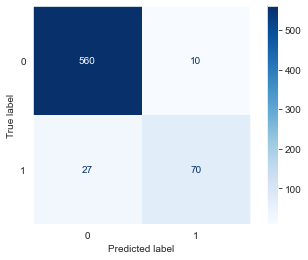

In [117]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(xgb_final, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('images/conf_matrix_XGB.png')

## Summary:

### Statistics of the Final Model in concise: 

> It clearly identifies 72% of the real churning customer. 87% of the customers whose anticipated churn was captured by the algoritm definitely did so (clearly remember).(accuracy)The f1-score's Harmonic Mean of Precision and Recall is 79%.

> The experimental database's identification number are:


### Unique identifiers:

> 70 confirmed positives were found

> There are 560 genuie negatives.

> 10 false alarms were discovered.

> 27 erroneous alarms were discored.

> 70 out of 125 customers who churn are successfully identified.

* Client that churn have higher probability of having a foreign plan than others who stay users.
* Compared with regular users, churn customers are reluctant to get a voicemail subcription.
* Contray to incumbent users, churn clients have fewer voicemails(as a result of less voicemail plan).
* Users with churn generate more queries to customer service than do customer base.
* In contrast to continuous customers, churn users have greater total dat minutes.

## Business Recommendations:

> Improve international plan to attract customers.

> For greater satisfaction, revamp its helpdesk(customer service).

> Accept a deal at discount with enough cumulative day moments.

## Next Step

> Ensure smooth functioning of the XGBT design(completed model).

> To understand how parameter influences the performance, browse for it properly

> To facilitate a better understanding and familarity of each parameter exploited in grid search.

> Analyze the influence of additional hyperparameter.

> To evaluate performance of the model and to alter parameters, use a scaled f1 score that emphasizes recall more accuracy